In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Homo 180mer

In [2]:
pdb_id = '5lqp'
save_folder = '~/Documents/5lqp_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

Successfully downloaded assembly file: /Users/sikao/Documents/5lqp_dir/5lqp-assembly1.cif.gz
Binding interfaces detected:
Chain AB:
  Center of Mass (COM): (246.0711212158203, 393.1337585449219, 231.68157958984375)
  Interfaces: ['AC', 'AD', 'DI', 'DP']
  Interface Coordinates: 
    (265.3112487792969, 386.1487731933594, 220.39401245117188)
    Interface Energy: 1.05
    (246.14024353027344, 392.3477783203125, 247.39950561523438)
    Interface Energy: 0.28
    (244.14588928222656, 394.69970703125, 227.9365692138672)
    Interface Energy: -42.35
    (248.9609832763672, 397.96038818359375, 248.785400390625)
    Interface Energy: -15.84
Chain AC:
  Center of Mass (COM): (287.8408508300781, 392.9450988769531, 226.6455535888672)
  Interfaces: ['AB', 'AD', 'FG']
  Interface Coordinates: 
    (272.753662109375, 391.731689453125, 223.1959991455078)
    Interface Energy: 1.05
    (285.2776184082031, 389.7743835449219, 246.472412109375)
    Interface Energy: -5.01
    (291.84027099609375, 393.86

In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using sequence alignment:
{'BL': 'A', 'CE': 'A', 'CO': 'A', 'BP': 'A', 'CF': 'A', 'GF': 'A', 'DA': 'A', 'DW': 'A', 'FZ': 'A', 'GV': 'A', 'CT': 'A', 'BG': 'A', 'BI': 'A', 'BW': 'A', 'GO': 'A', 'GG': 'A', 'FM': 'A', 'BR': 'A', 'DI': 'A', 'DX': 'A', 'FS': 'A', 'CQ': 'A', 'DH': 'A', 'CC': 'A', 'CW': 'A', 'FI': 'A', 'FD': 'A', 'BX': 'A', 'ES': 'A', 'BM': 'A', 'GL': 'A', 'EX': 'A', 'GN': 'A', 'BE': 'A', 'BU': 'A', 'GX': 'A', 'EW': 'A', 'BV': 'A', 'FO': 'A', 'DR': 'A', 'GA': 'A', 'DQ': 'A', 'DG': 'A', 'GH': 'A', 'FN': 'A', 'ET': 'A', 'AP': 'A', 'EN': 'A', 'CS': 'A', 'EI': 'A', 'FY': 'A', 'EL': 'A', 'GE': 'A', 'DF': 'A', 'AR': 'A', 'GY': 'A', 'CH': 'A', 'FC': 'A', 'GS': 'A', 'GR': 'A', 'DB': 'A', 'CB': 'A', 'BH': 'A', 'DK': 'A', 'AL': 'A', 'GB': 'A', 'BC': 'A', 'EV': 'A', 'GM': 'A', 'CV': 'A', 'GI': 'A', 'FA': 'A', 'GP': 'A', 'BS': 'A', 'FB': 'A', 'GT': 'A', 'FW': 'A', 'FU': 'A', 'DU': 'A', 'EH': 'A', 'FJ': 'A', 'AO': 'A', 'CP': 'A', 'BF': 'A', 'BJ': 'A', 'CM': 'A'

PyMOL>load /Users/sikao/Documents/5lqp_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/5lqp_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 180 atoms.
PyMOL>color blue, name INT
 Executive: Colored 660 atoms.
PyMOL>pseudoatom com_AB, pos=[246.071, 393.134, 231.682], color=red
 ObjMol: created com_AB/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_AB_1, pos=[265.311, 386.149, 220.394], color=blue
 ObjMol: created int_AB_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_AB, int_AB_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom 

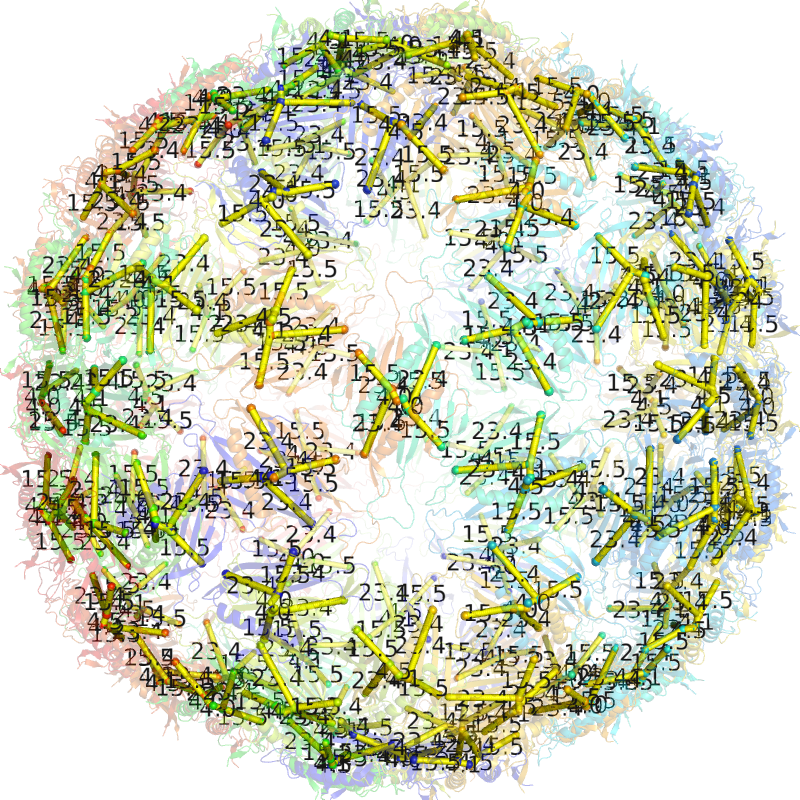

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))